# EDA

## Importación de las librerias

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
import calendar
from wordcloud import WordCloud, STOPWORDS
sns.set()
sns.set_palette('pastel')

Datos limpios

In [4]:
# Leer el archivo .parquet que fue exportado de la limpieza previa
df_limpio = pd.read_parquet('/content/drive/MyDrive/Colab Notebooks/PI1/ETL - EDA/movies_clean.parquet')

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks/PI1/ETL - EDA/movies_clean.parquet'

Información general

In [ ]:
# Imprimir las primeras filas
df_limpio.head()

In [6]:
# Imprimir las últimas filas de "df_clean"
df_limpio.tail()

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,...,tagline,title,vote_average,vote_count,languages,director,actores,overview_clean,release_year,return
45341,0.0,"drama,action,romance",30840,en,yet another version of the classic epic with e...,5.683753,"Westdeutscher Rundfunk (WDR), Working Title Fi...","Canada, Germany, United Kingdom, United States...",1991-05-13,0.0,...,None,Robin Hood,5.7,26.0,English,John Irvin,"Patrick Bergin, Uma Thurman, David Morrissey, ...",yet another version of the classic epic with e...,1991,0.0
45342,0.0,drama,111109,tl,an artist struggles to finish his work while a...,0.178241,Sine Olivia,Philippines,2011-11-17,0.0,...,None,Century of Birthing,9.0,3.0,None,Lav Diaz,"Angel Aquino, Perry Dizon, Hazel Orencio, Joel...",an artist struggle to finish his work while a ...,2011,0.0
45343,0.0,"action,drama,thriller",67758,en,when one of her hits goes wrong a professional...,0.903007,American World Pictures,United States of America,2003-08-01,0.0,...,A deadly game of wits.,Betrayal,3.8,6.0,English,Mark L. Lester,"Erika Eleniak, Adam Baldwin, Julie du Page, Ja...",when one of her hit go wrong a professional as...,2003,0.0
45344,0.0,None,227506,en,in a small town live two brothers one a minist...,0.003503,Yermoliev,Russia,1917-10-21,0.0,...,None,Satan Triumphant,0.0,0.0,None,Yakov Protazanov,"Iwan Mosschuchin, Nathalie Lissenko, Pavel Pav...",in a small town live two brother one a ministe...,1917,0.0
45345,0.0,None,461257,en,50 years after decriminalisation of homosexual...,0.163015,None,United Kingdom,2017-06-09,0.0,...,None,Queerama,0.0,0.0,English,Daisy Asquith,None,50 year after decriminalisation of homosexuali...,2017,0.0


In [7]:
# Lista los nombres de las columnas
df_limpio.columns

Index(['budget', 'genres', 'id', 'original_language', 'overview', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'languages', 'director', 'actores', 'overview_clean',
       'release_year', 'return'],
      dtype='object')

In [8]:
# Mostrar información general
df_limpio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45346 non-null  float64       
 1   genres                42962 non-null  object        
 2   id                    45346 non-null  int64         
 3   original_language     45335 non-null  object        
 4   overview              45346 non-null  object        
 5   popularity            45346 non-null  float64       
 6   production_companies  33557 non-null  object        
 7   production_countries  39138 non-null  object        
 8   release_date          45346 non-null  datetime64[ns]
 9   revenue               45346 non-null  float64       
 10  runtime               45100 non-null  float64       
 11  status                45266 non-null  object        
 12  tagline               20383 non-null  object        
 13  title           

Análisis

Variables numéricas

In [9]:
# Atributo popularity

# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.4f}'.format)
# Mostrar un resumen estadístico de la columna "popularity" con el formato establecido
df_limpio.popularity.describe()

,popularity
count,45346.0000
mean,2.9262
std,6.0110
min,0.0000
25%,0.3887
50%,1.1302
75%,3.6893
max,547.4883


In [10]:
# Convertir los valores numéricos en valores de cadena de texto y calcular la longitud de cada cadena
longitudes = df_limpio.popularity.astype(str).str.len()
# Obtener la longitud máxima de la columna
longitud_maxima = longitudes.max()
longitud_maxima

10

In [11]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.6f}'.format)
# Mostrar un conteo de los valores de popularidad que más se repiten en el atributo "popularity"
df_limpio.popularity.value_counts()

,count
popularity,
0.000001,56
0.000308,42
0.000000,40
0.000220,39
0.001177,38
...,...
1.756955,1
2.000936,1
2.365103,1


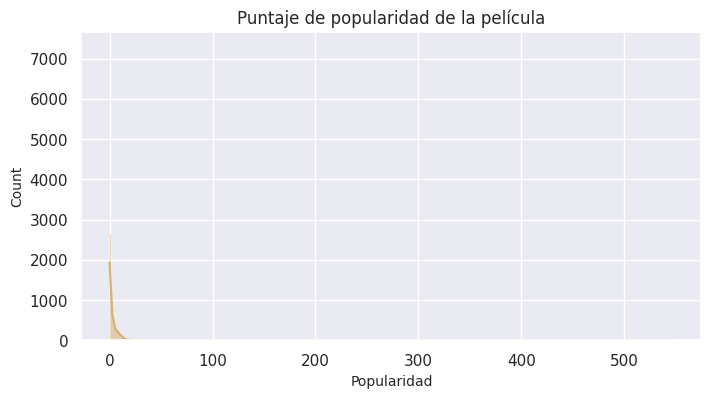

In [27]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_limpio, x = 'popularity', kde = True, color = '#D7AF70')
plt.title("Puntaje de popularidad de la película", fontsize = 12)
plt.xlabel("Popularidad", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

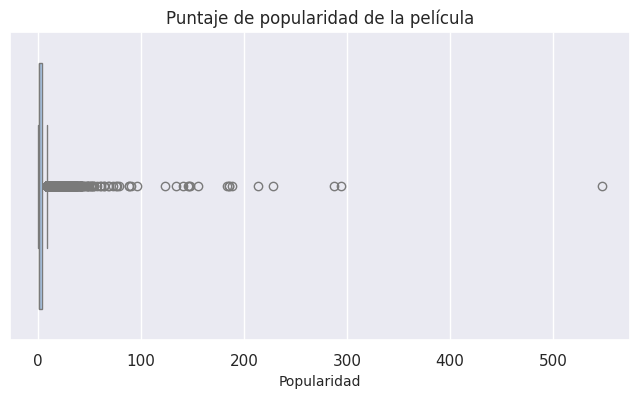

In [14]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_limpio.popularity)
plt.title("Puntaje de popularidad de la película", fontsize = 12)
plt.xlabel("Popularidad", fontsize = 10)
plt.show()

In [15]:
# Películas con escala de popularidad mayor a 100
df_limpio[df_limpio['popularity'] > 100][['popularity', 'title', 'release_year']]

,popularity,title,release_year
292,140.950236,Pulp Fiction,1994
12472,123.167259,The Dark Knight,2008
14540,185.070892,Avatar,2009
23632,154.801009,Gone Girl,2014
24306,183.870374,John Wick,2014
24410,213.849907,Big Hero 6,2014
24826,147.098006,The Hunger Games: Mockingjay - Part 1,2014
26513,133.827820,Pirates of the Caribbean: Dead Men Tell No Tales,2017
26517,187.860492,Deadpool,2016
26519,185.330992,Guardians of the Galaxy Vol. 2,2017


In [16]:
# Películas con escala de popularidad mayor a 100
df_limpio[df_limpio['popularity'] < 1][['popularity', 'title', 'release_year']].shape[0]

21152

In [17]:
# Cantidad de películas con la popularidad por debajo del promedio
avg_popularity = df_limpio['popularity'].mean()
df_limpio[df_limpio['popularity'] < avg_popularity].shape[0]

32306

In [18]:
# Cantidad de películas con la popularidad por encima del promedio
avg_popularity = df_limpio['popularity'].mean()
df_limpio[df_limpio['popularity'] > avg_popularity].shape[0]

13040

Atributo revenue

In [19]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.2f}'.format)
# Mostrar un resumen estadístico de la columna "revenue" con el formato establecido
df_limpio.revenue.describe()

,revenue
count,45346.00
mean,11233655.14
std,64409895.68
min,0.00
25%,0.00
50%,0.00
75%,0.00
max,2787965087.00


In [20]:
# Mostrar un conteo de las cifras de recaudación que más se repiten en el atributo "revenue"
df_limpio.revenue.value_counts().head()

,count
revenue,
0.00,37949
12000000.00,20
11000000.00,19
10000000.00,19
2000000.00,18


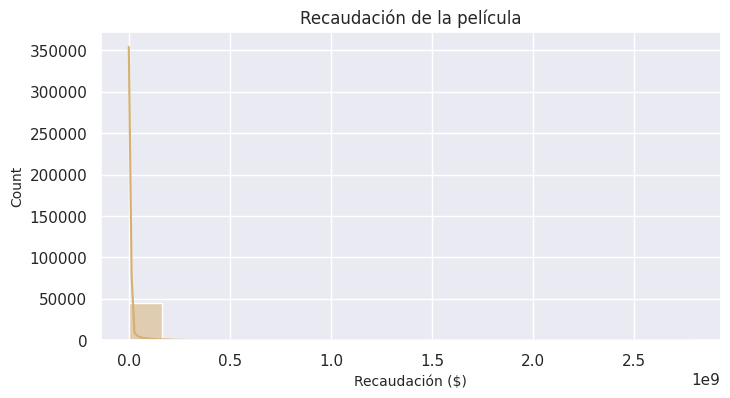

In [26]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_limpio, x = 'revenue', kde = True, color = '#D7AF70')
plt.title("Recaudación de la película", fontsize = 12)
plt.xlabel("Recaudación ($)", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

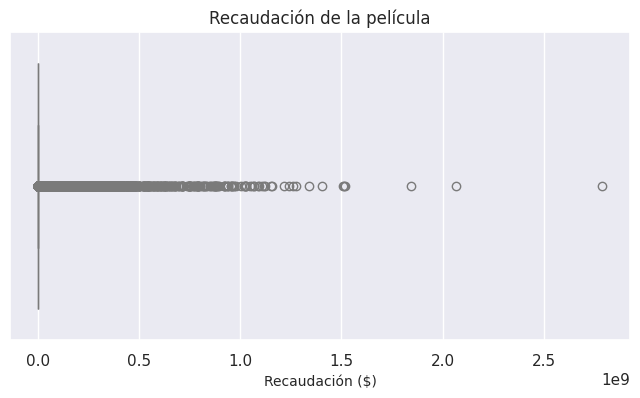

In [22]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_limpio.revenue)
plt.title("Recaudación de la película", fontsize = 12)
plt.xlabel("Recaudación ($)", fontsize = 10)
plt.show()

Atributo runtime

In [28]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.2f}'.format)
# Mostrar un resumen estadístico de la columna "revenue" con el formato establecido
df_limpio.runtime.describe()

,runtime
count,45100.00
mean,94.18
std,38.35
min,0.00
25%,85.00
50%,95.00
75%,107.00
max,1256.00


In [30]:
# Mostrar un conteo de los tiempos de duración que más se repiten en el atributo "runtime"
df_limpio.runtime.value_counts().head()

,count
runtime,
90.00,2548
0.00,1535
100.00,1470
95.00,1409
93.00,1212


In [31]:
# Títulos con tiempo de duración iguales a 0 minutos
df_limpio[df_limpio['runtime'] == 0][['runtime', 'title', 'status']]

,runtime,title,status
222,0.00,Dream Man,Released
224,0.00,Destiny Turns on the Radio,Released
398,0.00,Dos Crímenes,Released
554,0.00,"The Beans of Egypt, Maine",Released
667,0.00,The Run of the Country,Released
...,...,...,...
45252,0.00,How Most Things Work,Released
45253,0.00,LEGO DC Super Hero Girls: Brain Drain,Released
45281,0.00,All at Once,Released
45297,0.00,"Whiffles, Cubic Artist",Released


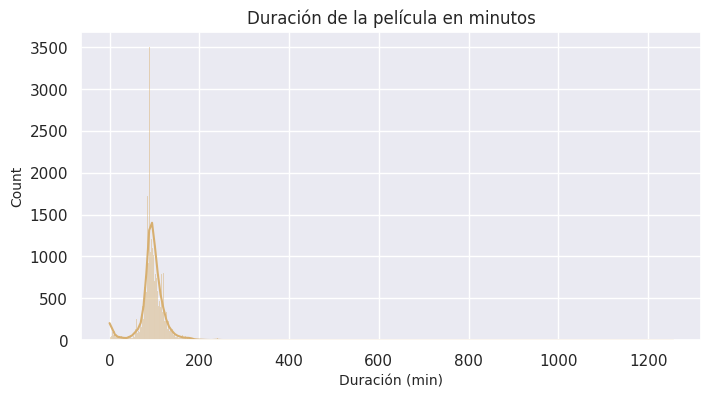

In [32]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_limpio, x = 'runtime', kde = True, color = '#D7AF70')
plt.title("Duración de la película en minutos", fontsize = 12)
plt.xlabel("Duración (min)", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

In [33]:
# Títulos con tiempo de duración superiores a los 200 minutos
df_limpio[df_limpio['runtime'] > 200][['runtime', 'title', 'vote_average']]

,runtime,title,vote_average
891,238.00,Gone with the Wind,7.70
919,201.00,Giant,7.50
1160,216.00,Lawrence of Arabia,7.80
1182,229.00,Once Upon a Time in America,8.30
1240,212.00,Ben-Hur,7.50
...,...,...,...
44850,210.00,5ive Days to Midnight,6.80
44882,240.00,Jesus,5.40
44947,206.00,The Adventures of Prince Florisel,6.50
45305,270.00,The Prisoner of If Castle,5.00


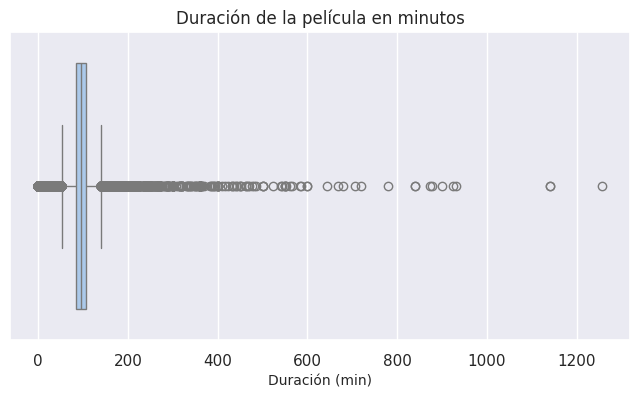

In [34]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_limpio.runtime)
plt.title("Duración de la película en minutos", fontsize = 12)
plt.xlabel("Duración (min)", fontsize = 10)
plt.show()

In [35]:
# Aplicando un filtrado intercuartílico
Q1 = df_limpio['runtime'].quantile(0.25)
Q3 = df_limpio['runtime'].quantile(0.75)
IQR = Q3 - Q1
LR = Q1 -(1.5 * IQR)
UR = Q3 + (1.5 * IQR)

value_below = df_limpio[df_limpio['runtime'] < LR].shape[0]
value_above = df_limpio[df_limpio['runtime'] > UR].shape[0]
print(f'LR: {round(LR, 1)}\nUR : {UR}')
print(f'Cantidad de valores por debajo de LR: {value_below}\nCantidad de valores por encima de UR: {value_above}')

LR: 52.0
UR : 140.0
Cantidad de valores por debajo de LR: 3427
Cantidad de valores por encima de UR: 1959




Atributo vote_average



In [36]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.2f}'.format)
# Mostrar un resumen estadístico de la columna "revenue" con el formato establecido
df_limpio.vote_average.describe()

,vote_average
count,45346.00
mean,5.62
std,1.92
min,0.00
25%,5.00
50%,6.00
75%,6.80
max,10.00


In [37]:
# Mostrar un conteo de los puntajes promedios que más se repiten en el atributo "vote_average"
df_limpio.vote_average.value_counts().head()

,count
vote_average,
0.00,2944
6.00,2461
5.00,1994
7.00,1882
6.50,1722


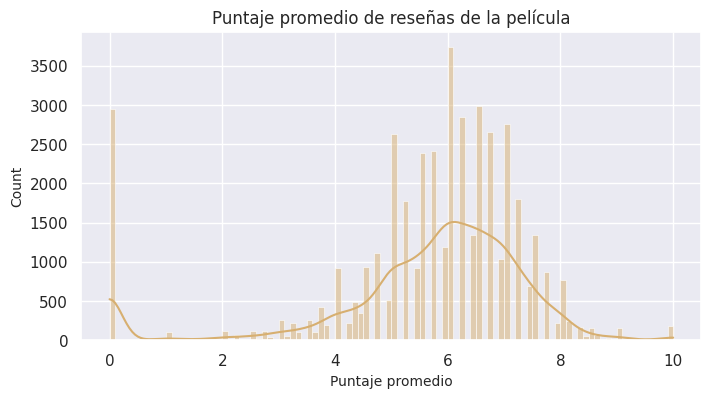

In [38]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_limpio, x = 'vote_average', kde = True, color = '#D7AF70')
plt.title("Puntaje promedio de reseñas de la película", fontsize = 12)
plt.xlabel("Puntaje promedio", fontsize = 10)
plt.ylabel("Count", fontsize = 10)
plt.show()

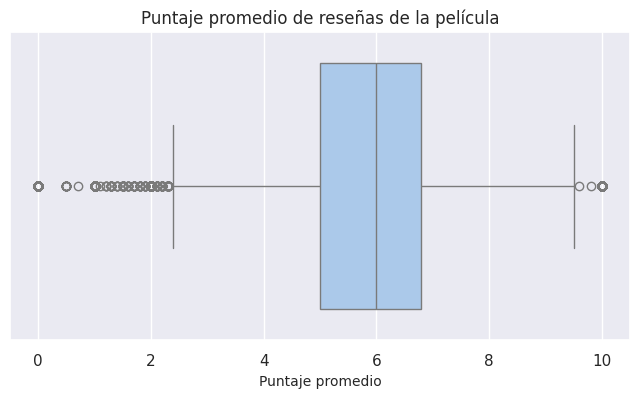

In [39]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_limpio.vote_average)
plt.title("Puntaje promedio de reseñas de la película", fontsize = 12)
plt.xlabel("Puntaje promedio", fontsize = 10)
plt.show()

In [40]:
# Aplicando un filtrado intercuartílico
Q1 = df_limpio['vote_average'].quantile(0.25)
Q3 = df_limpio['vote_average'].quantile(0.75)
IQR = Q3 - Q1
LR = Q1 -(1.5 * IQR)
UR = Q3 + (1.5 * IQR)

value_below = df_limpio[df_limpio['vote_average'] < LR].shape[0]
value_above = df_limpio[df_limpio['vote_average'] > UR].shape[0]
print(f'LR: {round(LR, 1)}\nUR : {UR}')
print(f'Cantidad de valores por debajo de LR: {value_below}\nCantidad de valores por encima de UR: {value_above}')

LR: 2.3
UR : 9.5
Cantidad de valores por debajo de LR: 3353
Cantidad de valores por encima de UR: 187


In [41]:
df_limpio[df_limpio['vote_average'] < LR].vote_average.value_counts().head(1)

,count
vote_average,
0.00,2944


In [42]:
df_limpio[df_limpio['vote_average'] > UR].vote_average.value_counts().head()

,count
vote_average,
10.00,185
9.60,1
9.80,1


Atributo vote_count

In [43]:
# Establecer el formato de visualización de los datos de punto flotante
pd.set_option('display.float_format', '{:.2f}'.format)
# Mostrar un resumen estadístico de la columna "vote_count" con el formato establecido
df_limpio.vote_count.describe()

,vote_count
count,45346.00
mean,110.14
std,491.90
min,0.00
25%,3.00
50%,10.00
75%,34.00
max,14075.00


In [44]:
# Mostrar un conteo del número de votos que más se repiten en el atributo "vote_count"
df_limpio.vote_count.value_counts().head()

,count
vote_count,
1.00,3240
2.00,3127
0.00,2846
3.00,2780
4.00,2477


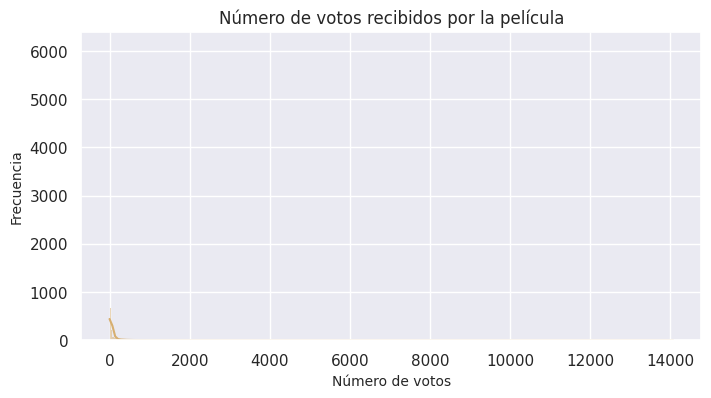

In [45]:
# Visualizar la distribucion de los datos
fig, ax = plt.subplots(figsize = (8,4))
sns.histplot(data = df_limpio, x = 'vote_count', kde = True, color = '#D7AF70')
plt.title("Número de votos recibidos por la película", fontsize = 12)
plt.xlabel("Número de votos", fontsize = 10)
plt.ylabel("Frecuencia", fontsize = 10)
plt.show()

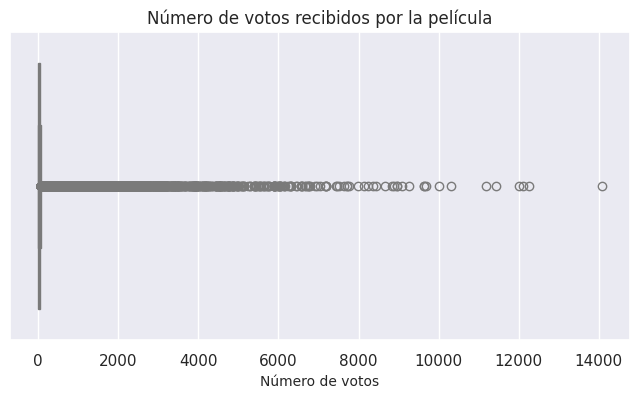

In [46]:
# Identificar outliers con boxplot
fig, ax = plt.subplots(figsize = (8, 4))
sns.boxplot(x = df_limpio.vote_count)
plt.title("Número de votos recibidos por la película", fontsize = 12)
plt.xlabel("Número de votos", fontsize = 10)
plt.show()

In [47]:
# Aplicando el filtrado intercuartílico
Q1 = df_limpio['vote_count'].quantile(0.25)
Q3 = df_limpio['vote_count'].quantile(0.75)
IQR = Q3 - Q1
LR = Q1 -(1.5 * IQR)
UR = Q3 + (1.5 * IQR)

value_below = df_limpio[df_limpio['vote_count'] < LR].shape[0]
value_above = df_limpio[df_limpio['vote_count'] > UR].shape[0]
print(f'LR: {round(LR, 1)}\nUR : {UR}')
print(f'Cantidad de valores por debajo de LR: {value_below}\nCantidad de valores por encima de UR: {value_above}')

LR: -43.5
UR : 80.5
Cantidad de valores por debajo de LR: 0
Cantidad de valores por encima de UR: 6881


In [48]:
# Mostrar un conteo del número de votos que más se repiten por debajo de UR en el atributo "vote_count"
df_limpio[df_limpio['vote_count'] < UR].vote_count.value_counts().head()

,count
vote_count,
1.00,3240
2.00,3127
0.00,2846
3.00,2780
4.00,2477


In [49]:
# Cantidad de películas con más de cien votos
df_limpio[df_limpio['vote_count'] >= 100].shape[0]

6050

In [50]:
# Cantidad de películas con más de cincuenta votos
df_limpio[df_limpio['vote_count'] >= 50].shape[0]

9141

Variables categóricas

Atributo genres

In [51]:
# Verificar la cantidad de valores faltantes para la columna "genres"
df_limpio.genres.isnull().sum()

2384

<ipython-input-54-452fb21ce341>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=colors)


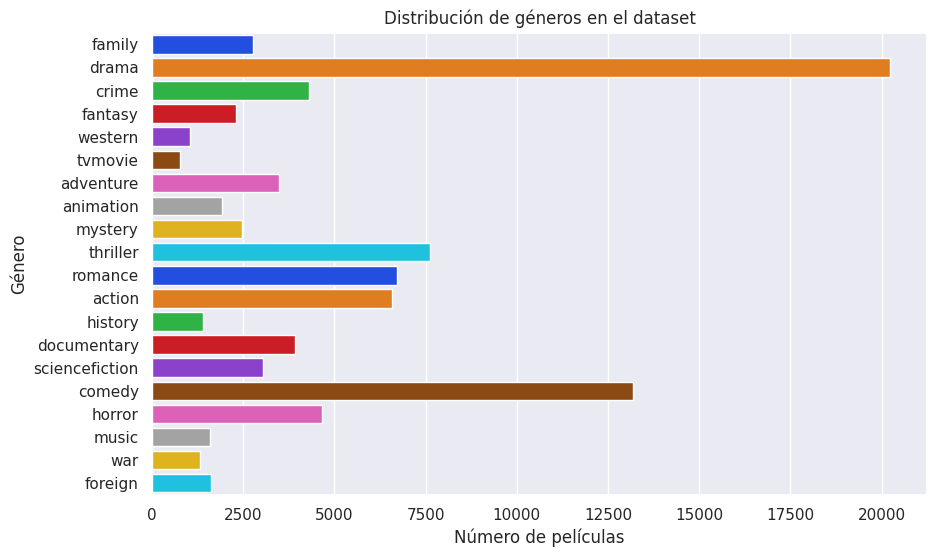

In [54]:
# Eliminar filas con valores faltantes en la columna "genres"
df_mod_limpio = df_limpio.dropna(subset=['genres'])

# Crear una lista de todos los géneros presentes en el dataset
all_genres = []

for genres in df_mod_limpio['genres']:
    genres_list = genres.split(',')
    all_genres.extend(genres_list)

unique_genres = set(all_genres)

# Contar cuántas películas hay en cada género
genre_counts = {}

for genre in unique_genres:
    count = 0
    for genres in df_mod_limpio['genres']:
        if genre in genres:
            count += 1
    genre_counts[genre] = count

genre_counts = pd.Series(genre_counts)

# Calcular la frecuencia relativa de cada género
genre_freqs = genre_counts / len(df_mod_limpio)

# Crear una paleta de colores pasteles personalizada
colors = sns.color_palette('bright', n_colors=len(genre_counts))

# Graficar un gráfico de barras para mostrar la distribución de géneros
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette=colors)
plt.xlabel('Número de películas')
plt.ylabel('Género')
plt.title('Distribución de géneros en el dataset')
plt.show()

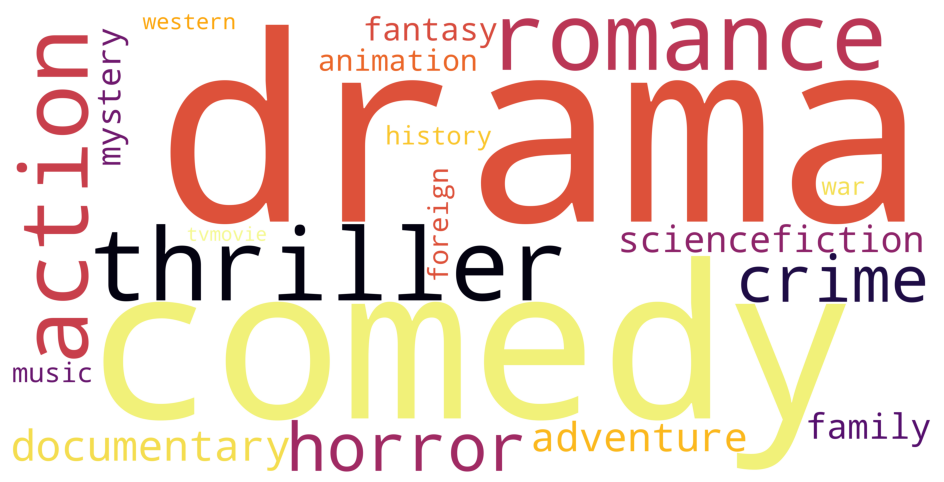

In [61]:
# Eliminar filas con valores faltantes en la columna "genres"
df_mod_limpio = df_limpio.dropna(subset=['genres'])

from collections import Counter

# Crear una lista de todas las palabras en la columna "genres"
all_genres = []
for genres in df_mod_limpio['genres']:
    genres_list = genres.split(',')
    all_genres.extend(genres_list)

# Calcular la frecuencia de cada género
genres_counts = Counter(all_genres)

# Crear un diccionario con los géneros y sus frecuencias
genres_dict = dict(genres_counts)

# Generar la nube de palabras con todos los géneros
title_wordcloud = WordCloud(background_color='white', height=2000, width=4000, colormap= 'inferno').generate_from_frequencies(genres_dict)
plt.figure(figsize=(12, 6))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [62]:
# Crear un DataFrame de indicadores de género utilizando el método str.get_dummies()
genres_df = df_limpio['genres'].str.get_dummies(sep = ',')
# Sumar las columnas de "genres_df" de géneros para obtener la cantidad total de películas en cada género
genre_count = genres_df.sum().sort_values(ascending=False)
# Convertir la cantidad de películas en cada género en porcentajes del total
genre_percentages = genre_count / len(df_limpio) * 100
# Imprimir la lista de géneros con sus porcentajes
print('Lista de los 10 géneros más populares:')
for genre, percentage in genre_percentages.head(10).items():
  print(f"- {genre}: {percentage:.2f}%")

Lista de los 10 géneros más populares:
- drama: 44.62%
- comedy: 29.05%
- thriller: 16.79%
- romance: 14.84%
- action: 14.53%
- horror: 10.29%
- crime: 9.49%
- documentary: 8.64%
- adventure: 7.69%
- sciencefiction: 6.70%


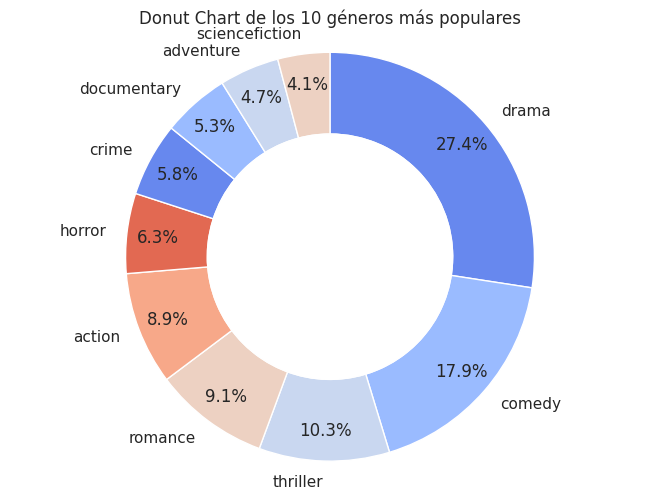

In [65]:
# Obtener los 10 géneros más populares
top_genres = genre_percentages.head(10)

# Configurar los datos para el gráfico
labels = top_genres.index
sizes = top_genres.values

# Crear el donut chart utilizando seaborn y matplotlib
fig, ax = plt.subplots()
sns.set_palette('viridis')
wedges, texts, autotexts = ax.pie(sizes, labels=labels, startangle=90, counterclock=False,
                                  wedgeprops={'width': 0.4}, autopct='%1.1f%%', pctdistance=0.85)

# Añadir un círculo blanco en el centro para crear el donut chart
center_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(center_circle)

# Añadir título al gráfico
ax.set_title('Donut Chart de los 10 géneros más populares')

# Ajustar el aspecto del gráfico
ax.axis('equal')
plt.tight_layout(pad=0)

# Mostrar el gráfico
plt.show()

Atributo title

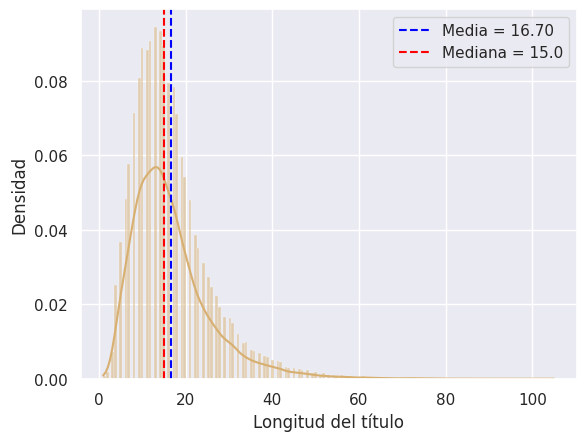

In [70]:
# Longitud del resúmen de peliculas

# Calcular la longitud de los títulos de las películas
title_lengths = df_limpio['title'].apply(len)

# Calcular la media, mediana y desviación estándar de la longitud de los títulos
mean_length = title_lengths.mean()
median_length = title_lengths.median()
std_length = title_lengths.std()

# Graficar un histograma y una distribución de densidad para mostrar la distribución de la longitud de los títulos
sns.histplot(title_lengths, kde=True, stat='density', color='#D7AF70')
plt.axvline(mean_length, color='blue', linestyle='dashed', linewidth=1.5, label=f'Media = {mean_length:.2f}')
plt.axvline(median_length, color='red', linestyle='dashed', linewidth=1.5, label=f'Mediana = {median_length}')
plt.legend()
plt.xlabel('Longitud del título')
plt.ylabel('Densidad')
plt.show()

Nube de palabras

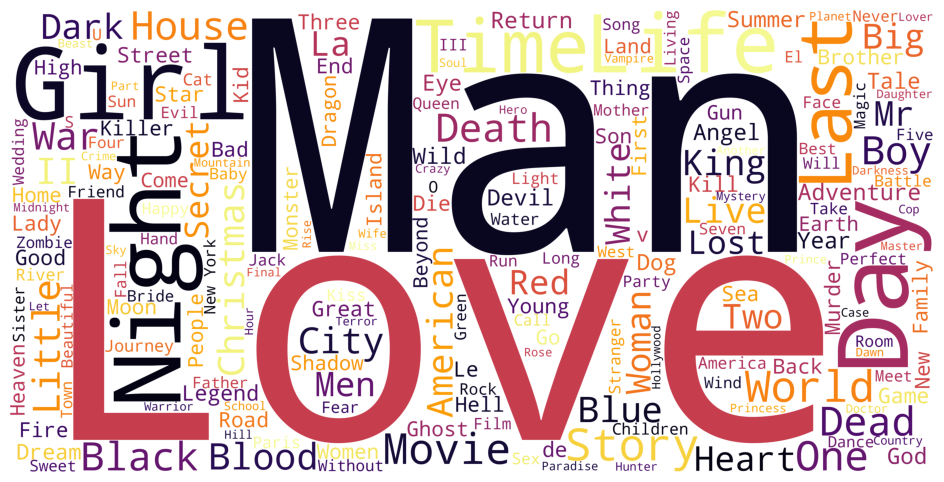

In [72]:
title_esp = ' '.join(df_limpio['title'])
title_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000, colormap='inferno').generate(title_esp)
plt.figure(figsize = (12,6))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

Atributo overview_clean y overview

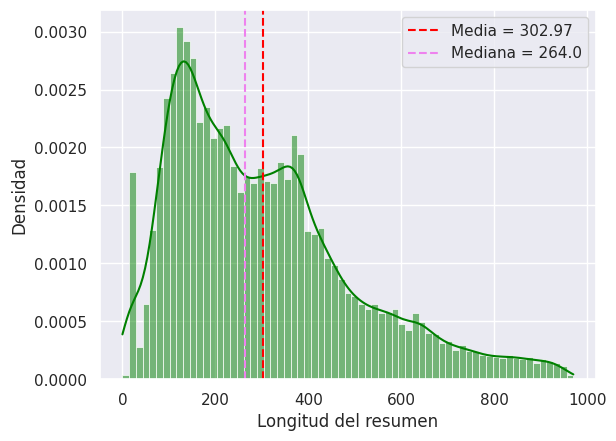

In [73]:
# Calcular la longitud de los resúmenes
overview_length = df_limpio['overview_clean'].apply(len)

# Graficar un histograma y una distribución de densidad para mostrar la distribución de la longitud de los resúmenes
sns.histplot(overview_length, kde=True, stat='density', color='green')
plt.axvline(overview_length.mean(), color='red', linestyle='dashed', linewidth=1.5, label=f'Media = {overview_length.mean():.2f}')
plt.axvline(overview_length.median(), color='violet', linestyle='dashed', linewidth=1.5, label=f'Mediana = {overview_length.median()}')
plt.legend()
plt.xlabel('Longitud del resumen')
plt.ylabel('Densidad')
plt.show()

Nube de palabras

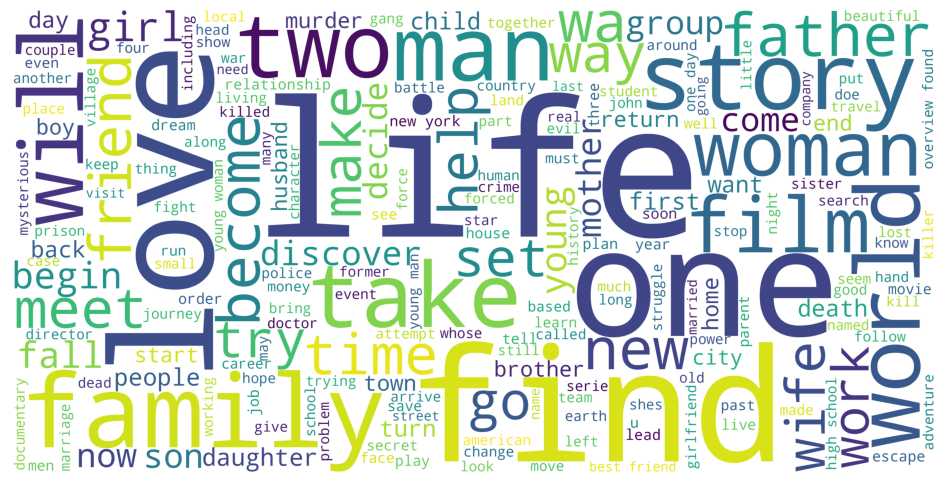

In [74]:
# Eliminar filas con valores faltantes en la columna "overview"
df_overview = df_limpio.dropna(subset=['overview_clean'])

# Agregar "ha" a la lista de stopwords
custom_stopwords = set(STOPWORDS)
custom_stopwords.add("ha")

overview_esp = ' '.join(df_overview['overview_clean'])
overview_wordcloud = WordCloud(stopwords=custom_stopwords, background_color='white', height=2000, width=4000).generate(overview_esp)
plt.figure(figsize=(12, 6))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

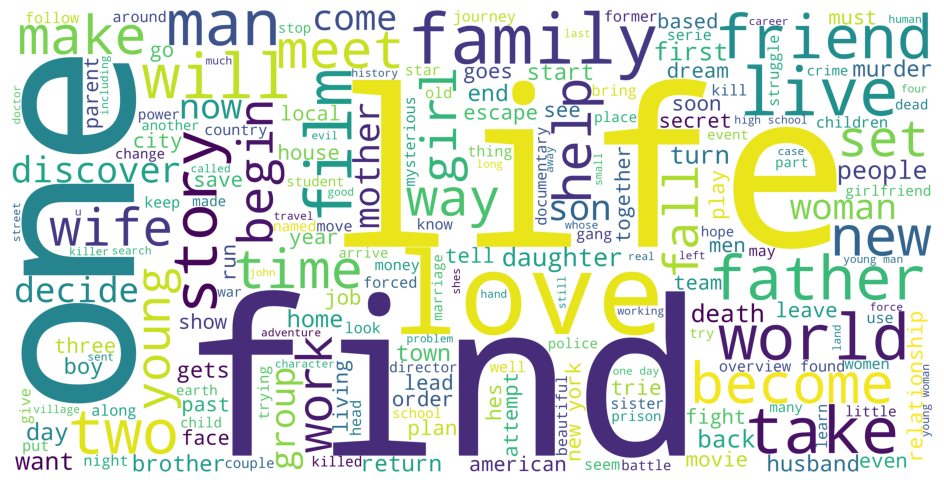

In [75]:
# Eliminar filas con valores faltantes en la columna "overview"
df_overview = df_limpio.dropna(subset=['overview'])

overview_esp = ' '.join(df_overview['overview'])
overview_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(overview_esp)
plt.figure(figsize = (12,6))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

Atributo production_companies

<ipython-input-76-8ce920741f7f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_companies.values, y=top_companies.index, orient='h', palette=colors)


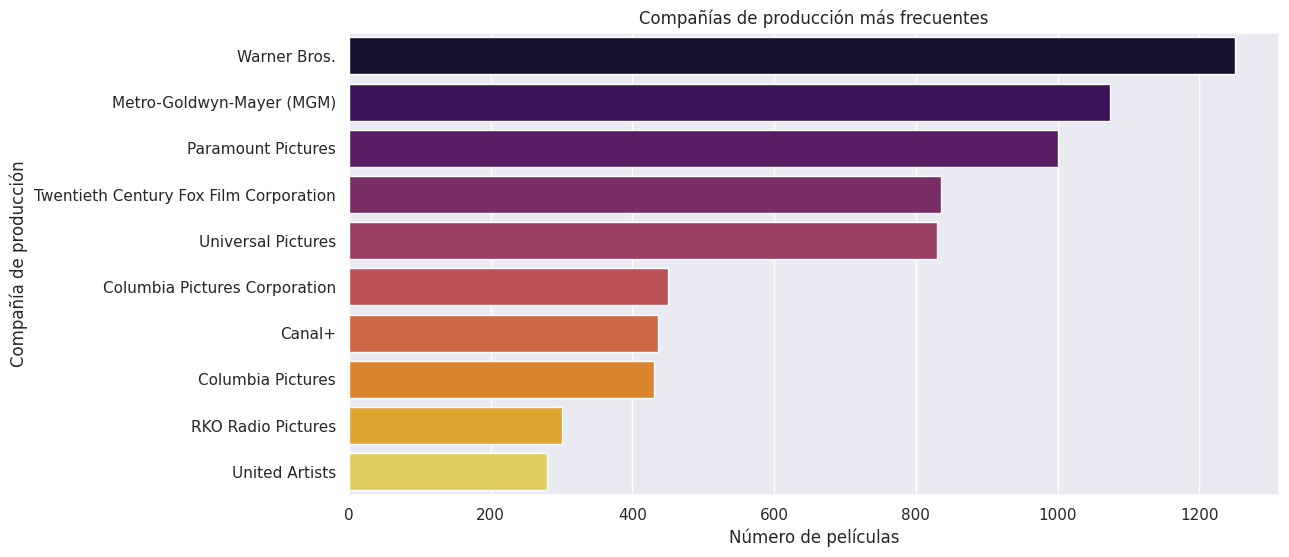

In [76]:
# Eliminar las filas con valores nulos en la columna 'production_companies'
df = df_limpio.dropna(subset=['production_companies'])

# Dividir las compañías de producción en una lista de strings
company_list = df['production_companies'].str.split(',').explode().str.strip()

# Contar la frecuencia de cada compañía de producción
company_counts = company_list.value_counts()

# Identificar las compañías de producción más frecuentes
top_companies = company_counts.head(10)

# Definir la paleta de colores
colors = sns.color_palette('inferno', n_colors=len(top_companies))

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x=top_companies.values, y=top_companies.index, orient='h', palette=colors)
plt.xlabel('Número de películas')
plt.ylabel('Compañía de producción')
plt.title('Compañías de producción más frecuentes')
plt.show()

Atributo tagline

In [77]:
# Verificar la cantidad de valores faltantes para la columna "tagline"
df_limpio.tagline.isnull().sum()

24963

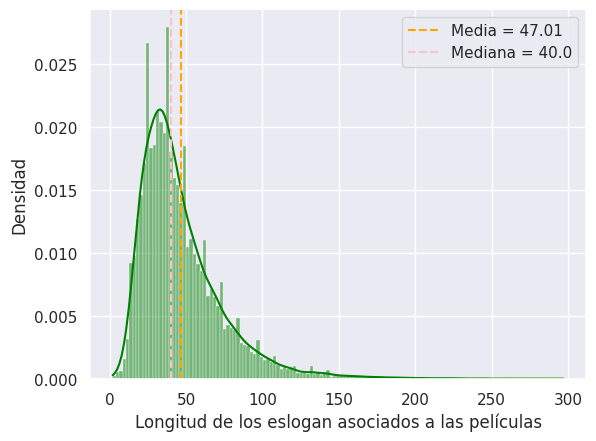

In [84]:
# Eliminar filas con valores faltantes en la columna "tagline"
df_mod_limpio = df_limpio.dropna(subset=['tagline'])

# Calcular la longitud de los eslogan de las películas
tagline_lengths = df_mod_limpio['tagline'].apply(len)

# Calcular la media, mediana y desviación estándar de la longitud de los eslogan de las películas
mean_length = tagline_lengths.mean()
median_length = tagline_lengths.median()
std_length = tagline_lengths.std()

# Graficar un histograma y una distribución de densidad para mostrar la distribución de la longitud de los eslogan de las películas
sns.histplot(tagline_lengths, kde=True, stat='density', color='green')
plt.axvline(mean_length, color='orange', linestyle='dashed', linewidth=1.5, label=f'Media = {mean_length:.2f}')
plt.axvline(median_length, color='pink', linestyle='dashed', linewidth=1.5, label=f'Mediana = {median_length}')
plt.legend()
plt.xlabel('Longitud de los eslogan asociados a las películas')
plt.ylabel('Densidad')
plt.show()

Nube de palabras

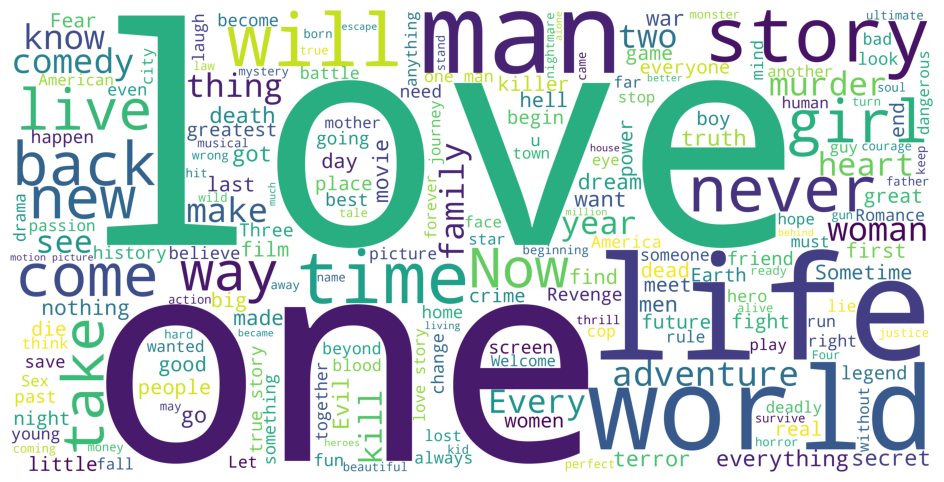

In [85]:
# Eliminar filas con valores faltantes en la columna "tagline"
df_mod_limpio = df_limpio.dropna(subset=['tagline'])

tagline_esp = ' '.join(df_mod_limpio['tagline'])
tagline_wordcloud = WordCloud(stopwords = STOPWORDS, background_color = 'white', height = 2000, width = 4000).generate(tagline_esp)
plt.figure(figsize = (12,6))
plt.imshow(tagline_wordcloud)
plt.axis('off')
plt.show()

Análisis bivariable

budget vs revenue

Análisis comparación entre presupuesto y recaudación

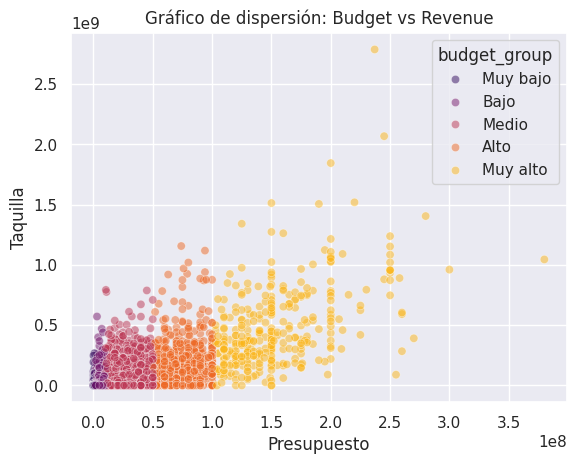

In [87]:
# visualizar si hay una relación entre el presupuesto de una película y su taquilla
bins = [0, 1000000, 10000000, 50000000, 100000000, 400000000]
labels = ['Muy bajo', 'Bajo', 'Medio', 'Alto', 'Muy alto']
df_limpio['budget_group'] = pd.cut(df_limpio['budget'], bins=bins, labels=labels)
sns.scatterplot(data=df_limpio, x='budget', y='revenue', hue='budget_group', palette='inferno', alpha=0.5)
plt.xlabel('Presupuesto')
plt.ylabel('Taquilla')
plt.title('Gráfico de dispersión: Budget vs Revenue')
plt.show()

<ipython-input-89-14d666cff5bd>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='revenue', y=0, data=df_agg, palette='inferno', order=df_agg[0])


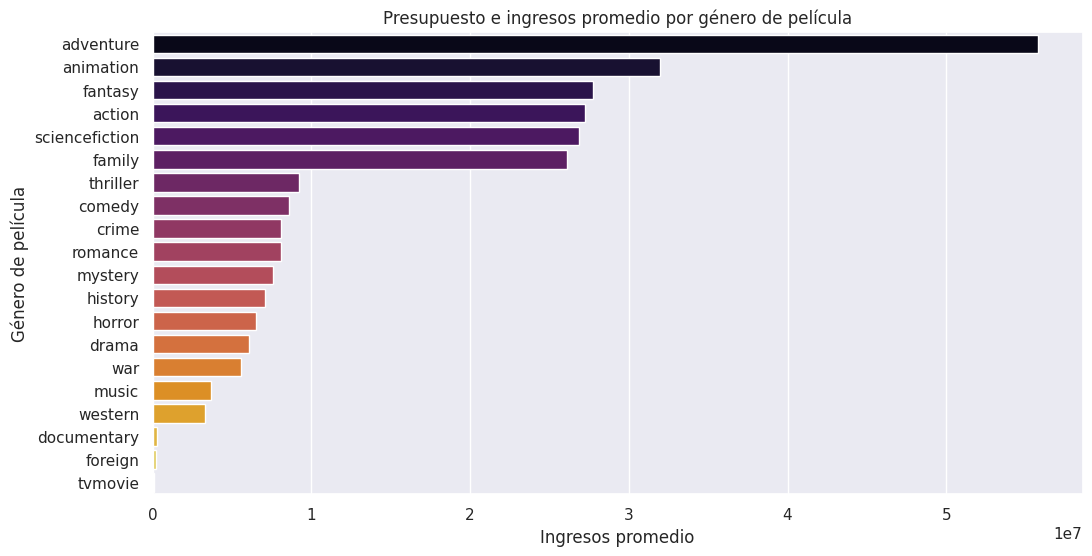

In [89]:
# Seleccionar las columnas de interés
df = df_limpio[['genres', 'budget', 'revenue']].copy()
# Eliminar las filas que contienen valores nulos en la columna "genres"
df = df.dropna(subset=['genres'])

# Separar los géneros en columnas individuales
df_genres = df['genres'].str.split(',', expand=True)
# Concatenar las columnas de género con las columnas de presupuesto e ingresos
df_genres = pd.concat([df[['budget', 'revenue']], df_genres], axis=1)

# Convertir las columnas "budget" y "revenue" a tipo numérico
df_genres[['budget', 'revenue']] = df_genres[['budget', 'revenue']].astype(int)
# Calcular el presupuesto e ingresos promedio por género de película
df_agg = df_genres.groupby([0])[['budget', 'revenue']].mean().reset_index()
# Ordenar los datos por ingresos promedio
df_agg = df_agg.sort_values(by='revenue', ascending=False)

# Crear el gráfico de barras utilizando Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x='revenue', y=0, data=df_agg, palette='inferno', order=df_agg[0])
plt.xlabel('Ingresos promedio')
plt.ylabel('Género de película')
plt.title('Presupuesto e ingresos promedio por género de película')
plt.show()

Vote_average vs genres

Análisis de la relación entre los géneros y el voto promedio

<ipython-input-90-84ac781ebdb3>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vote_by_genre.index, y=vote_by_genre.values, palette=colors)


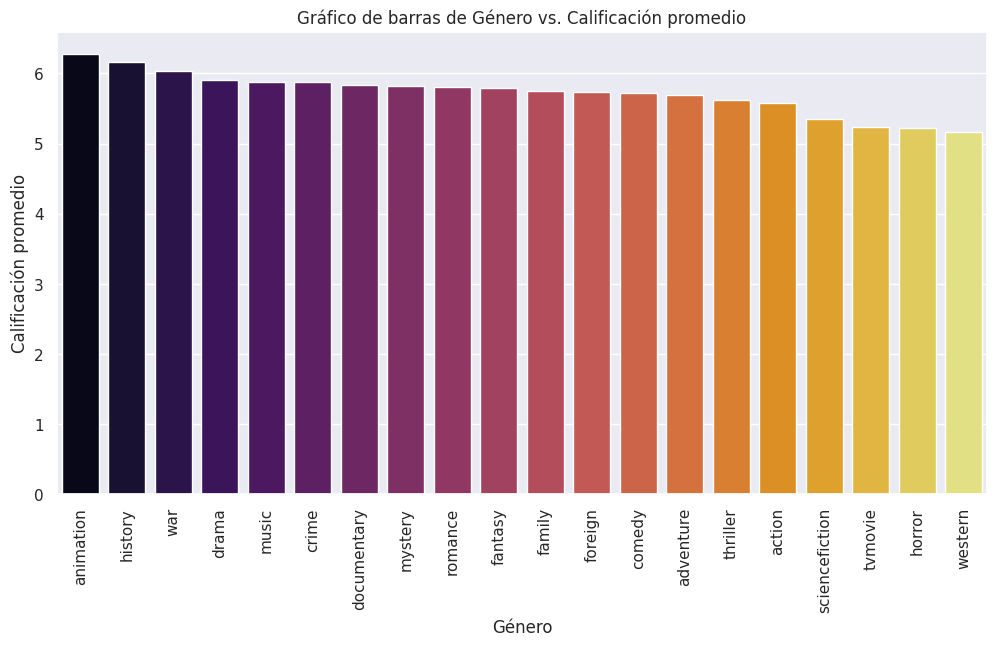

In [90]:
# Seleccionar las columnas de interés
df = df_limpio[['genres', 'vote_average']].copy()
# Eliminar las filas que contienen valores nulos
df = df.dropna()

# Separar los géneros y contar la calificación promedio por género
genres_vote = df['genres'].str.split(',').explode().to_frame()
genres_vote['vote_average'] = df['vote_average']
vote_by_genre = genres_vote.groupby('genres')['vote_average'].mean().sort_values(ascending=False)

# Crear la paleta de colores con Seaborn
colors = sns.color_palette('inferno', len(vote_by_genre))

# Graficar utilizando Seaborn
plt.figure(figsize=(12,6))
sns.barplot(x=vote_by_genre.index, y=vote_by_genre.values, palette=colors)
plt.xticks(rotation = 90)
plt.xlabel('Género')
plt.ylabel('Calificación promedio')
plt.title('Gráfico de barras de Género vs. Calificación promedio')
plt.show()

popularity vs genres

Análisis entre géneros y popularidad

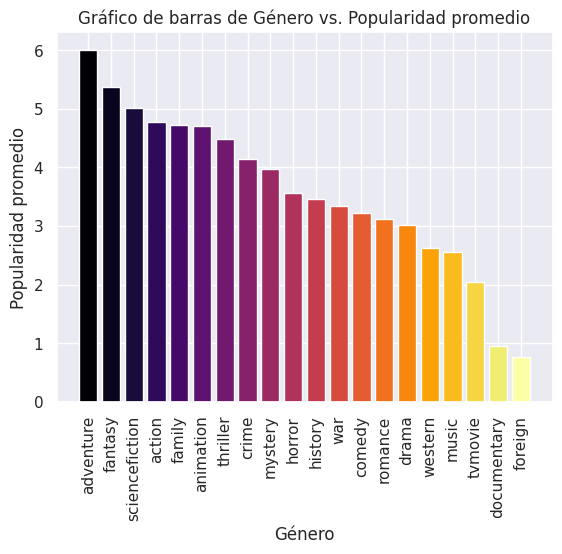

In [92]:
# Seleccionar las columnas de interés
df = df_limpio[['genres', 'popularity']].copy()
# Eliminar las filas que contienen valores nulos
df = df.dropna()

# Separar los géneros y contar la popularidad promedio por género
genres_popularity = df['genres'].str.split(',').explode().to_frame()
genres_popularity['popularity'] = df['popularity']
popularity_by_genre = genres_popularity.groupby('genres')['popularity'].mean().sort_values(ascending=False)

# Graficar
plt.bar(popularity_by_genre.index, popularity_by_genre.values, color=plt.cm.inferno(np.linspace(0, 1, len(popularity_by_genre))))
plt.xticks(rotation=90)
plt.xlabel('Género')
plt.ylabel('Popularidad promedio')
plt.title('Gráfico de barras de Género vs. Popularidad promedio')
plt.show()

release_date vs title

Cantidad de peliculas (mes, día y año)

<ipython-input-93-cd8c2a4328ff>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='inferno')
<ipython-input-93-cd8c2a4328ff>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(months_spanish)


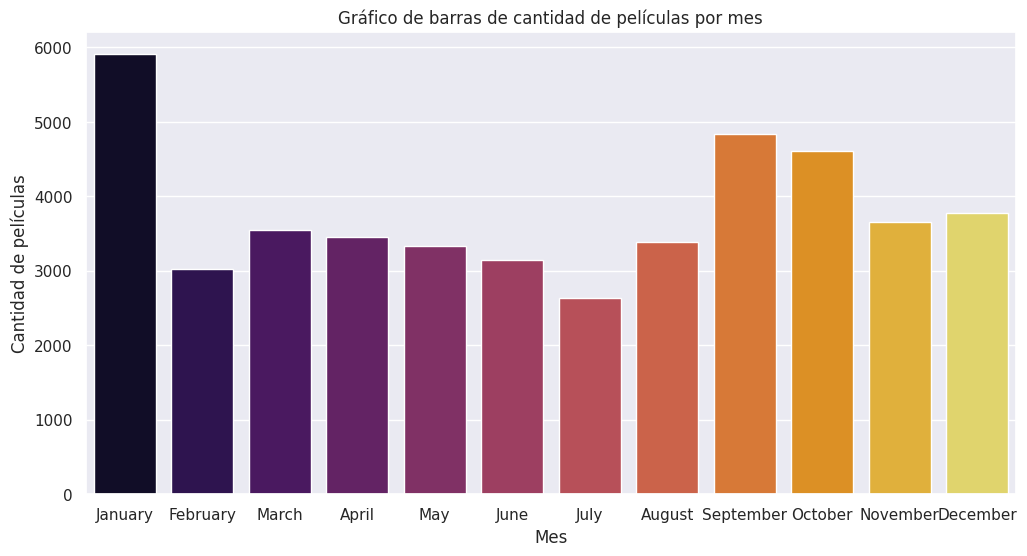

In [93]:
# Crear un gráfico de barras de la cantidad de películas por mes
df_limpio['month'] = pd.DatetimeIndex(df_limpio['release_date']).month
month_counts = df_limpio['month'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='inferno')
plt.xlabel('Mes')
plt.ylabel('Cantidad de películas')
plt.title('Gráfico de barras de cantidad de películas por mes')

# Cambiar el idioma de los meses a español
months_spanish = [calendar.month_name[i] for i in range(1,13)]
ax = plt.gca()
ax.set_xticklabels(months_spanish)

plt.show()

<ipython-input-94-4a1ec7115b4b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_día_semana.index, y=counts_día_semana.values, palette='inferno')
<ipython-input-94-4a1ec7115b4b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(días_semana_español)


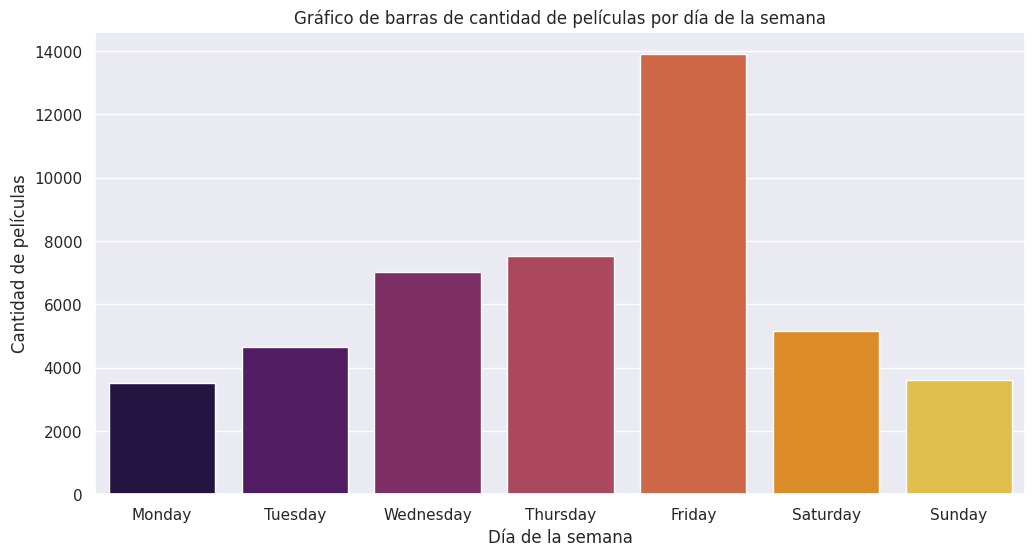

In [94]:
# Crear un gráfico de barras de la cantidad de películas por día de la semana
df_limpio['dia_semana'] = pd.DatetimeIndex(df_limpio['release_date']).weekday
counts_día_semana = df_limpio['dia_semana'].value_counts().sort_index()
plt.figure(figsize=(12,6))
sns.barplot(x=counts_día_semana.index, y=counts_día_semana.values, palette='inferno')
plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de películas')
plt.title('Gráfico de barras de cantidad de películas por día de la semana')

# Cambiar el idioma de los días de la semana a español
días_semana_español = [calendar.day_name[i] for i in range(7)]
ax = plt.gca()
ax.set_xticklabels(días_semana_español)

plt.show()

<ipython-input-95-fc771ecacd08>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts_año_intervalo.index, y=counts_año_intervalo.values, palette='inferno')
<ipython-input-95-fc771ecacd08>:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(años_spanish, rotation=45, ha='right')


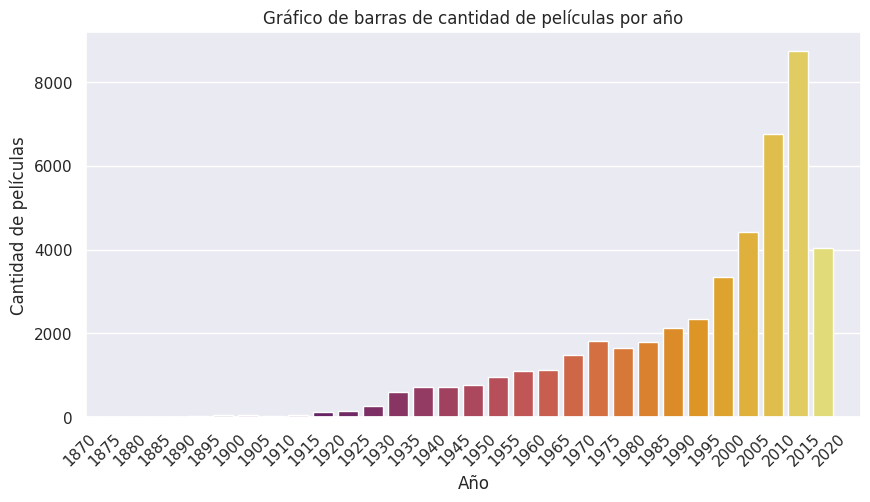

In [95]:
# Crear un gráfico de barras de la cantidad de películas por año
df_limpio['año'] = pd.DatetimeIndex(df_limpio['release_date']).year
counts_año = df_limpio['año'].value_counts().sort_index()

# Agrupar los años en intervalos de 10 años
counts_año_intervalo = counts_año.groupby((counts_año.index//5)*5).sum()

plt.figure(figsize=(10,5))
sns.barplot(x=counts_año_intervalo.index, y=counts_año_intervalo.values, palette='inferno')
plt.xlabel('Año')
plt.ylabel('Cantidad de películas')
plt.title('Gráfico de barras de cantidad de películas por año')

# Cambiar el idioma de los años a español y rotar las etiquetas
ax = plt.gca()
formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
ax.xaxis.set_major_formatter(formatter)
años_spanish = [str(int(i)) for i in counts_año_intervalo.index]
ax.set_xticklabels(años_spanish, rotation=45, ha='right')

plt.show()

overview vs vote_average

Relación entre el resumen y la calidad de las peliculas

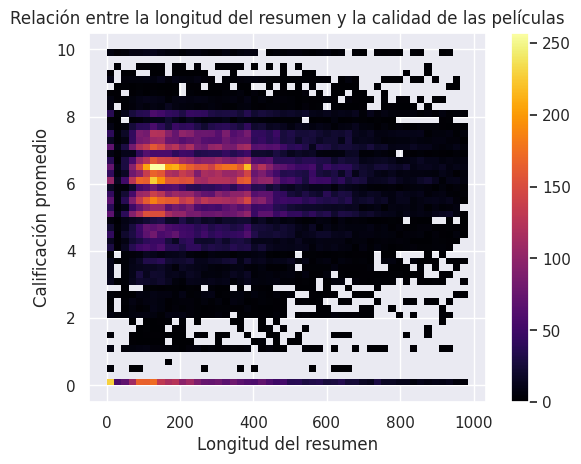

In [96]:
# Crear un DataFrame con las columnas 'overview' y 'vote_average'
df = df_limpio[['overview', 'vote_average']].copy()
# Eliminar filas con valores faltantes en la columna 'overview'
df = df.dropna(subset=['overview'])

# Calcular la longitud del resumen y agregarla como una nueva columna
df['overview_length'] = df['overview'].apply(len)

# Crear el gráfico de dispersión con heatmap
sns.histplot(data=df, x='overview_length', y='vote_average', bins=50, cmap='inferno', cbar=True)

# Agregar etiquetas y títulos al gráfico
plt.xlabel('Longitud del resumen')
plt.ylabel('Calificación promedio')
plt.title('Relación entre la longitud del resumen y la calidad de las películas')

# Mostrar el gráfico
plt.show()

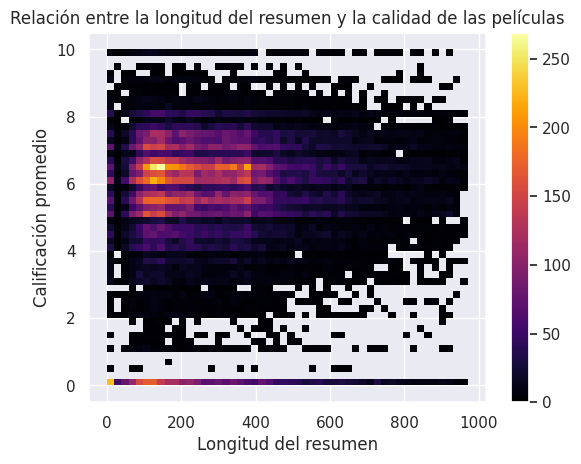

In [97]:
# Crear un DataFrame con las columnas 'overview' y 'vote_average'
df = df_limpio[['overview_clean', 'vote_average']].copy()
# Eliminar filas con valores faltantes en la columna 'overview'
df = df.dropna(subset=['overview_clean'])

# Calcular la longitud del resumen y agregarla como una nueva columna
df['overview_length'] = df['overview_clean'].apply(len)

# Crear el gráfico de dispersión con heatmap
sns.histplot(data=df, x='overview_length', y='vote_average', bins=50, cmap='inferno', cbar=True)

# Agregar etiquetas y títulos al gráfico
plt.xlabel('Longitud del resumen')
plt.ylabel('Calificación promedio')
plt.title('Relación entre la longitud del resumen y la calidad de las películas')

# Mostrar el gráfico
plt.show()

actors vs title

Análisis de los actores que más aparecen en las películas

In [102]:
# Crear un DataFrame con las columnas 'actors' y 'title'
df = df_limpio[['actores', 'title']].copy()
# Eliminar filas con valores faltantes en la columna 'actors'
df = df.dropna(subset=['actores'])

<ipython-input-103-f9c68b85b521>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_actors.index, x=top_actors.values, palette='inferno')


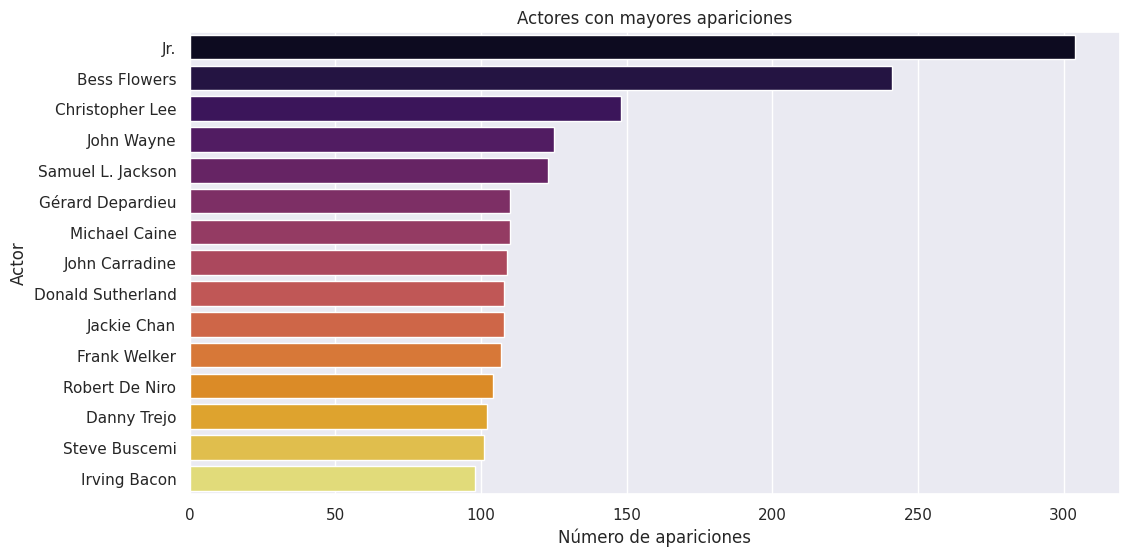

In [103]:
# Crear un DataFrame con una fila para cada actor
actors_df = df['actores'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('actor')
actors_df['actor'] = actors_df['actor'].str.strip()

# Contar el número de apariciones de cada actor y seleccionar los 15 actores con más apariciones
top_actors = actors_df['actor'].value_counts()[:15]

# Graficar los actores con más apariciones
plt.subplots(figsize=(12,6))
ax = sns.barplot(y=top_actors.index, x=top_actors.values, palette='inferno')
ax.set_title('Actores con mayores apariciones')
ax.set_xlabel('Número de apariciones')
ax.set_ylabel('Actor')
plt.show()

directs vs title

Análisis de directores con más películas dirigidas

In [104]:
# Crear un DataFrame con las columnas 'director' y 'vote_average'
df = df_limpio[['director', 'title']].copy()
# Eliminar filas con valores faltantes en la columna 'director'
df = df.dropna(subset=['director'])

<ipython-input-105-8cf9505a31f2>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=top_director.index, x=top_director.values, palette='inferno')


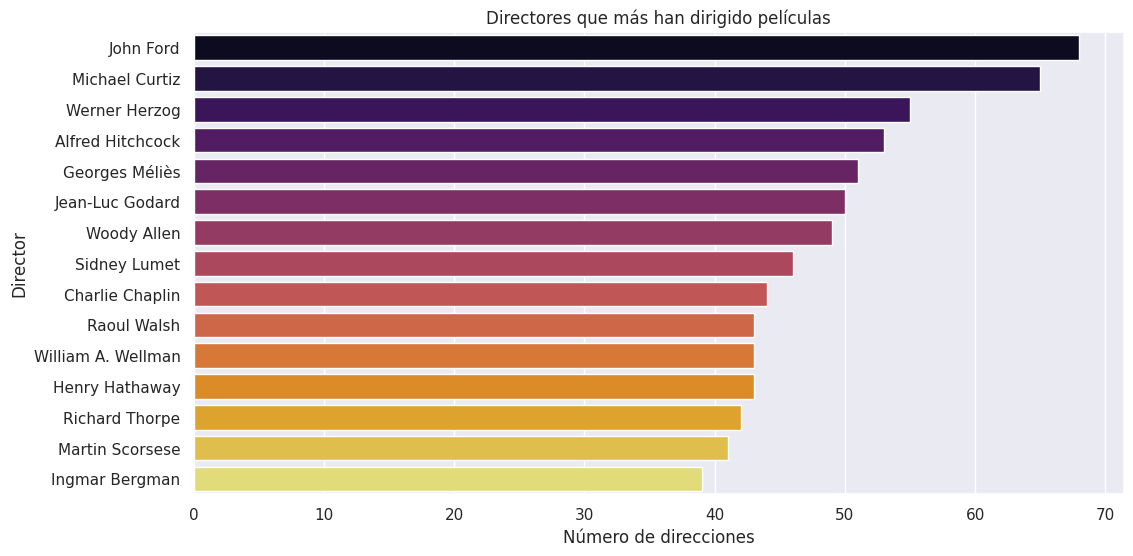

In [105]:
# Crear un DataFrame con una fila para cada director
director_df = df['director'].str.split(',', expand=True).stack().reset_index(level=1, drop=True).to_frame('director')
director_df['director'] = director_df['director'].str.strip()

# Contar el número de apariciones de cada director y seleccionar los 15 directores con más apariciones
top_director = director_df['director'].value_counts()[:15]

# Graficar los directores con más apariciones
plt.subplots(figsize=(12,6))
ax = sns.barplot(y=top_director.index, x=top_director.values, palette='inferno')
ax.set_title('Directores que más han dirigido películas')
ax.set_xlabel('Número de direcciones')
ax.set_ylabel('Director')
plt.show()

Análisis multivariado

Relación entre 2 o más variables

Mapa de calor entre variables numéricas

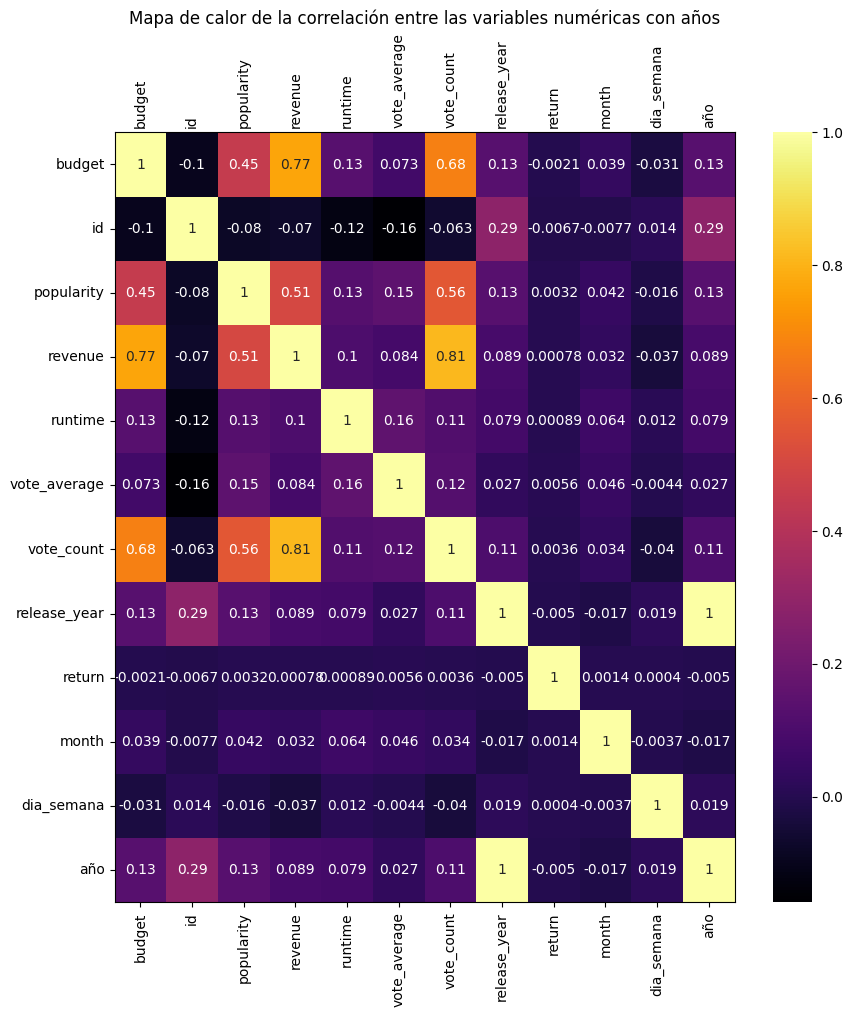

In [107]:
# Restablecer los parámetros predeterminados de matplotlib
plt.rcParams.update(plt.rcParamsDefault)

# Tu código aquí sin la configuración global de seaborn
# Seleccionar solo las columnas numéricas del DataFrame df_limpio
df = df_limpio.select_dtypes(include=[np.number])
# Eliminar filas con valores faltantes
df = df.dropna()
# Calcular la matriz de correlación entre las variables numéricas
corr = df.corr()

# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(10, 10))
# Crear el mapa de calor con una paleta de colores magma y etiquetas de valores de correlación
sns.heatmap(corr, cmap='inferno', annot=True, ax=ax)

# Agregar un eje de tiempo en la parte superior del mapa de calor
years = corr.columns.values
ax2 = ax.twiny()
ax2.set_xlim(ax.get_xlim())
ax2.set_xticks(ax.get_xticks())
ax2.set_xticklabels(years, rotation=90)
ax2.tick_params(axis='x', which='both', length=0)

# Añadir el título del gráfico
plt.title('Mapa de calor de la correlación entre las variables numéricas con años')
# Mostrar el gráfico
plt.show()

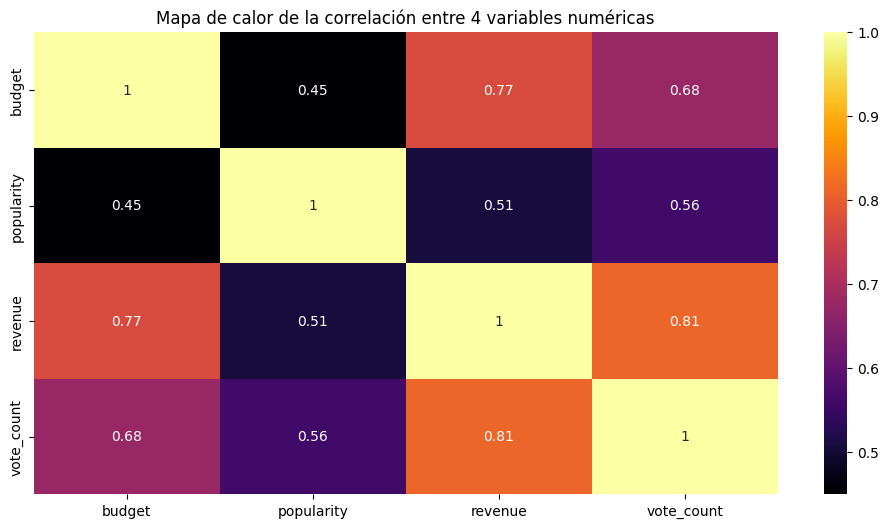

In [108]:
# Seleccionar las columnas relevantes del DataFrame df_limpio
df_subset = df_limpio[['budget', 'popularity', 'revenue', 'vote_count']]

# Eliminar filas con valores faltantes
df_subset = df_subset.dropna()

# Calcular la matriz de correlación entre las variables seleccionadas
corr_subset = df_subset.corr()

# Ajustar el tamaño de la figura
fig, ax = plt.subplots(figsize=(12, 6))

# Crear el mapa de calor con una paleta de colores magma y etiquetas de valores de correlación
sns.heatmap(corr_subset, cmap='inferno', annot=True, ax=ax)

# Añadir el título del gráfico
plt.title('Mapa de calor de la correlación entre 4 variables numéricas')
# Mostrar el gráfico
plt.show()